In [53]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image
from keras.models import load_model
import os

In [68]:
model = load_model('models/mnist.h5')

In [3]:
def img_show(img):
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [4]:
def get_class(i):
    letter = '0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z a b c d e f g h i j k l m n o p q r s t u v w x y z'
    letter_list = letter.split()
    print(letter_list[i])

In [6]:
def img_normalize(img):
    return img / 255

In [62]:
def img_threshold(img):
    ret, thresh = cv.threshold(img, 100, 255, cv.THRESH_BINARY_INV)
    return thresh

In [46]:
def img_crop(img):
    x = 12
    y = 12
    h = 200
    w = 200
    return img[y: y + h, x: x + w]

In [48]:
def img_normalize(img):
    return img / 255

In [47]:
def img_resize(img):
    img = cv.resize(img, (28, 28))
    img = img.reshape(1, 28, 28, 1)
    return img

In [39]:
prediction = model.predict_classes(img)
print(get_class(prediction[0]))

3
None


In [70]:
def main(img_name):
    path = 'datasets/' + img_name
    img = cv.imread(path, 0)
    img = img_crop(img)
    img = img_threshold(img)
    img = img_normalize(img)
    img_show(img)
    img = img_resize(img)
    P = model.predict_classes(img)
    print(get_class(P[0]))

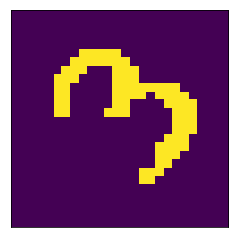

7
None


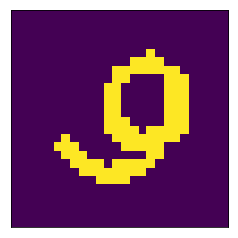

8
None


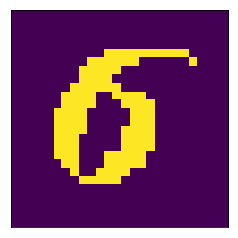

6
None


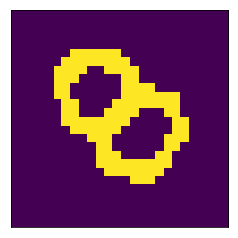

8
None


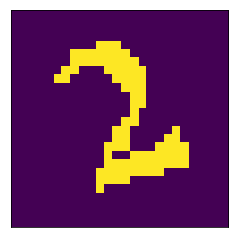

2
None


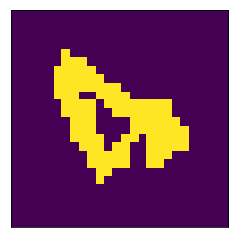

6
None


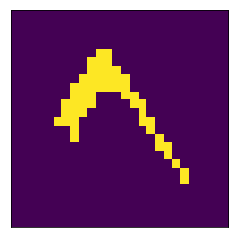

7
None


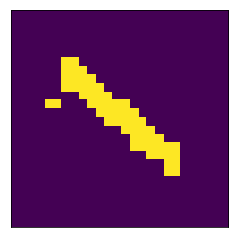

5
None


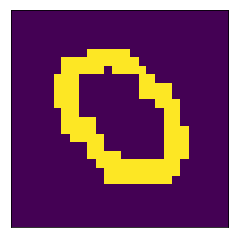

0
None


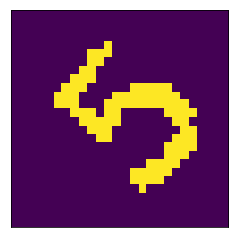

5
None


In [71]:
path = 'datasets/'
for i in os.listdir(path):
    if '.png' in i:
        main(i)
